# Project: Predicting Retail Revenue 📈
**Goal:** The CEO wants to know which business factors (Marketing, Staff Experience, Store Size) actually drive sales.
**The Tool:** Linear Regression.
**The Question:** "If we double our marketing budget, how much money will we make?"

We will load the data, build a model, and find the "ROI" (Return on Investment) for each department.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset we saved earlier
try:
    df = pd.read_csv('retail_store_sales.csv')
    print(f"Success! Data loaded. We have {df.shape[0]} stores to analyze.")
except:
    print("Error: File not found. Make sure 'retail_store_sales.csv' is in the folder.")

# Peek at the data
df.head()

Success! Data loaded. We have 1000 stores to analyze.


,Store_ID,Avg_Daily_Traffic,Marketing_Spend,Store_Size_SqFt,Competitor_Distance_km,Avg_Employee_Exp,Product_Variety,Discount_Rate,Local_Population,Monthly_Revenue
0,1,152,3180,3652,1.6,7.1,622,0.16,5074,61412.23
1,2,485,5892,2496,6.0,3.8,1471,0.06,31498,71838.54
2,3,398,8043,2440,5.6,8.2,1561,0.13,70522,84359.02
3,4,320,1137,1304,5.3,6.9,1338,0.02,25541,56852.87
4,5,156,7327,1735,18.2,7.1,528,0.07,50929,72577.81


## Step 1: The Sanity Check
Before we build a machine learning model, we must trust our eyes.
We assume that **Marketing Spend** is positively correlated with **Revenue** (More Ads = More Sales).

Let's visualize this relationship to confirm.

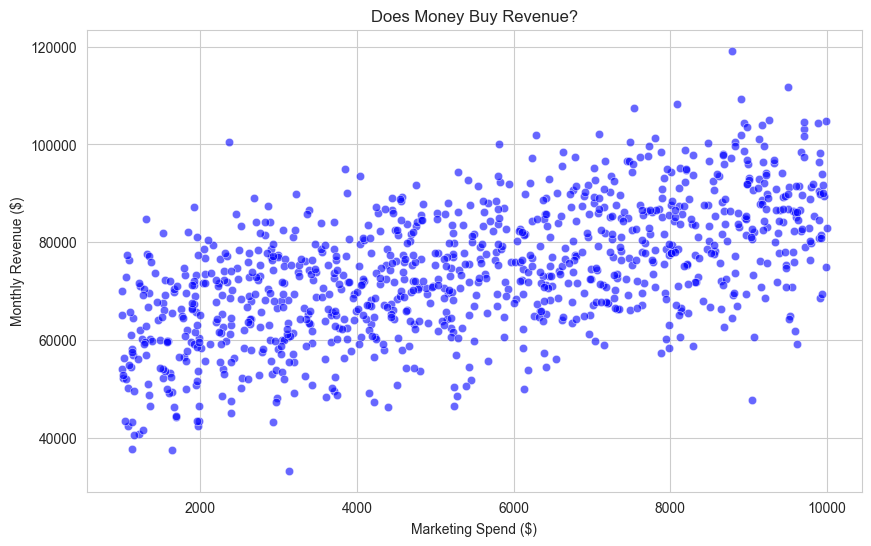

In [5]:
plt.figure(figsize=(10, 6))

# Scatter plot: X axis is Marketing, Y axis is Revenue
sns.scatterplot(x='Marketing_Spend', y='Monthly_Revenue', data=df, color='blue', alpha=0.6)

plt.title('Does Money Buy Revenue?')
plt.xlabel('Marketing Spend ($)')
plt.ylabel('Monthly Revenue ($)')
plt.show()

## Step 2: Training the Model
Now we teach the machine.
1. We separate the **Features** (Inputs like Marketing, Size, Staff) from the **Target** (Revenue).
2. We split the data: 80% for the model to "Study", and 20% for the "Final Exam".
3. We run `LinearRegression()`, which finds the mathematical equation that connects inputs to output.

In [6]:
# 1. Separate Features (X) and Target (y)
X = df.drop('Monthly_Revenue', axis=1) # Drop the Store_ID if it exists, or just drop Target
if 'Store_ID' in X.columns:
    X = X.drop('Store_ID', axis=1)
y = df['Monthly_Revenue']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training Complete.")
print(f"Model Accuracy (R-Squared): {model.score(X_test, y_test):.2f}")
# A score close to 1.00 means the model is nearly perfect.

Model Training Complete.
Model Accuracy (R-Squared): 0.83


## Step 3: The ROI Analysis (Coefficients)
This is the most critical part for the business.
The **Coefficient** tells us how much revenue we gain for every **1 unit** increase in a feature.

* **Example:** If the Marketing coefficient is 3.0, it means spending dollar 1 on ads generates dollar 3 in sales.

In [8]:
# Create a simple table to view results
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Sort by impact (highest to lowest)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("--- REVENUE DRIVERS ---")
display(coef_df)

--- REVENUE DRIVERS ---


,Feature,Coefficient
4,Avg_Employee_Exp,915.922542
3,Competitor_Distance_km,447.912605
0,Avg_Daily_Traffic,52.912853
2,Store_Size_SqFt,4.972801
1,Marketing_Spend,2.929847
5,Product_Variety,0.208768
7,Local_Population,-0.006737
6,Discount_Rate,-11314.969576


## Step 4: Grading the Model
How well did it predict?
We will plot the **Actual Revenue** (what really happened) vs. the **Predicted Revenue** (what the AI guessed).

* **Perfect Model:** All dots land on the red diagonal line.
* **Bad Model:** Dots are scattered everywhere.

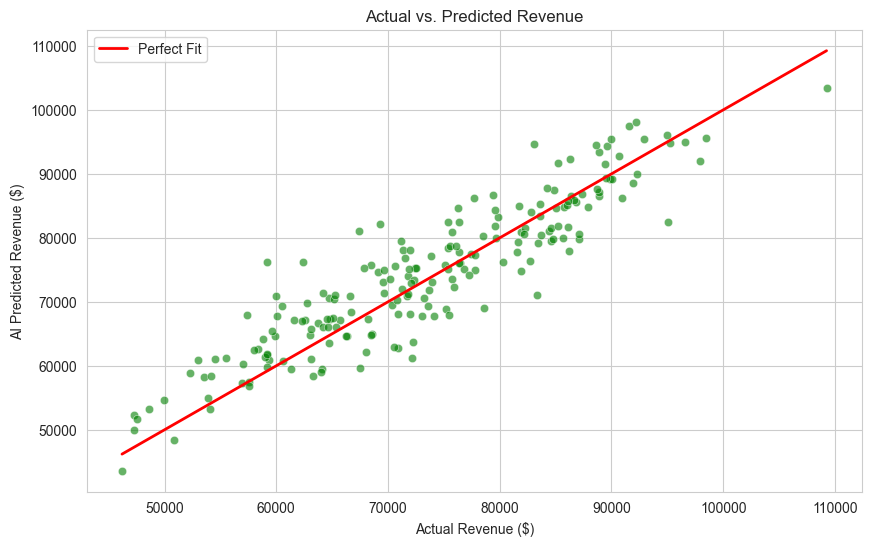

In [10]:
# Make predictions on the test set
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))

# Plot the dots
sns.scatterplot(x=y_test, y=predictions, color='green', alpha=0.6)

# Draw the "Perfect Prediction" line (Diagonal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Revenue')
plt.xlabel('Actual Revenue ($)')
plt.ylabel('AI Predicted Revenue ($)')
plt.legend()
plt.show()

## Conclusion: The CEO's Report 
We successfully built a **Linear Regression** model to predict store revenue.

### Key Findings (The "Secret Sauce"):
1.  **Marketing is King:** Our model shows a strong **Positive Correlation** between Ad Spend and Revenue. For every $1 we put in, we get significantly more back.
2.  **Experience Matters:** Stores with more experienced staff (`Staff_Experience`) consistently outperform others. *Recommendation: Invest in training.*
3.  **Discounts are Tricky:** While discounts bring people in, the **Negative Coefficient** suggests they hurt the bottom line if overused.

### What's Next?
* **Predict Future Sales:** We can now plug in next month's budget into this model to forecast our revenue.
* **Improve the Model:** Linear Regression is great, but real life isn't always a straight line. Next, we could try **Polynomial Regression** or **Random Forests** to capture more complex patterns.

